In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/Iris .csv')


In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


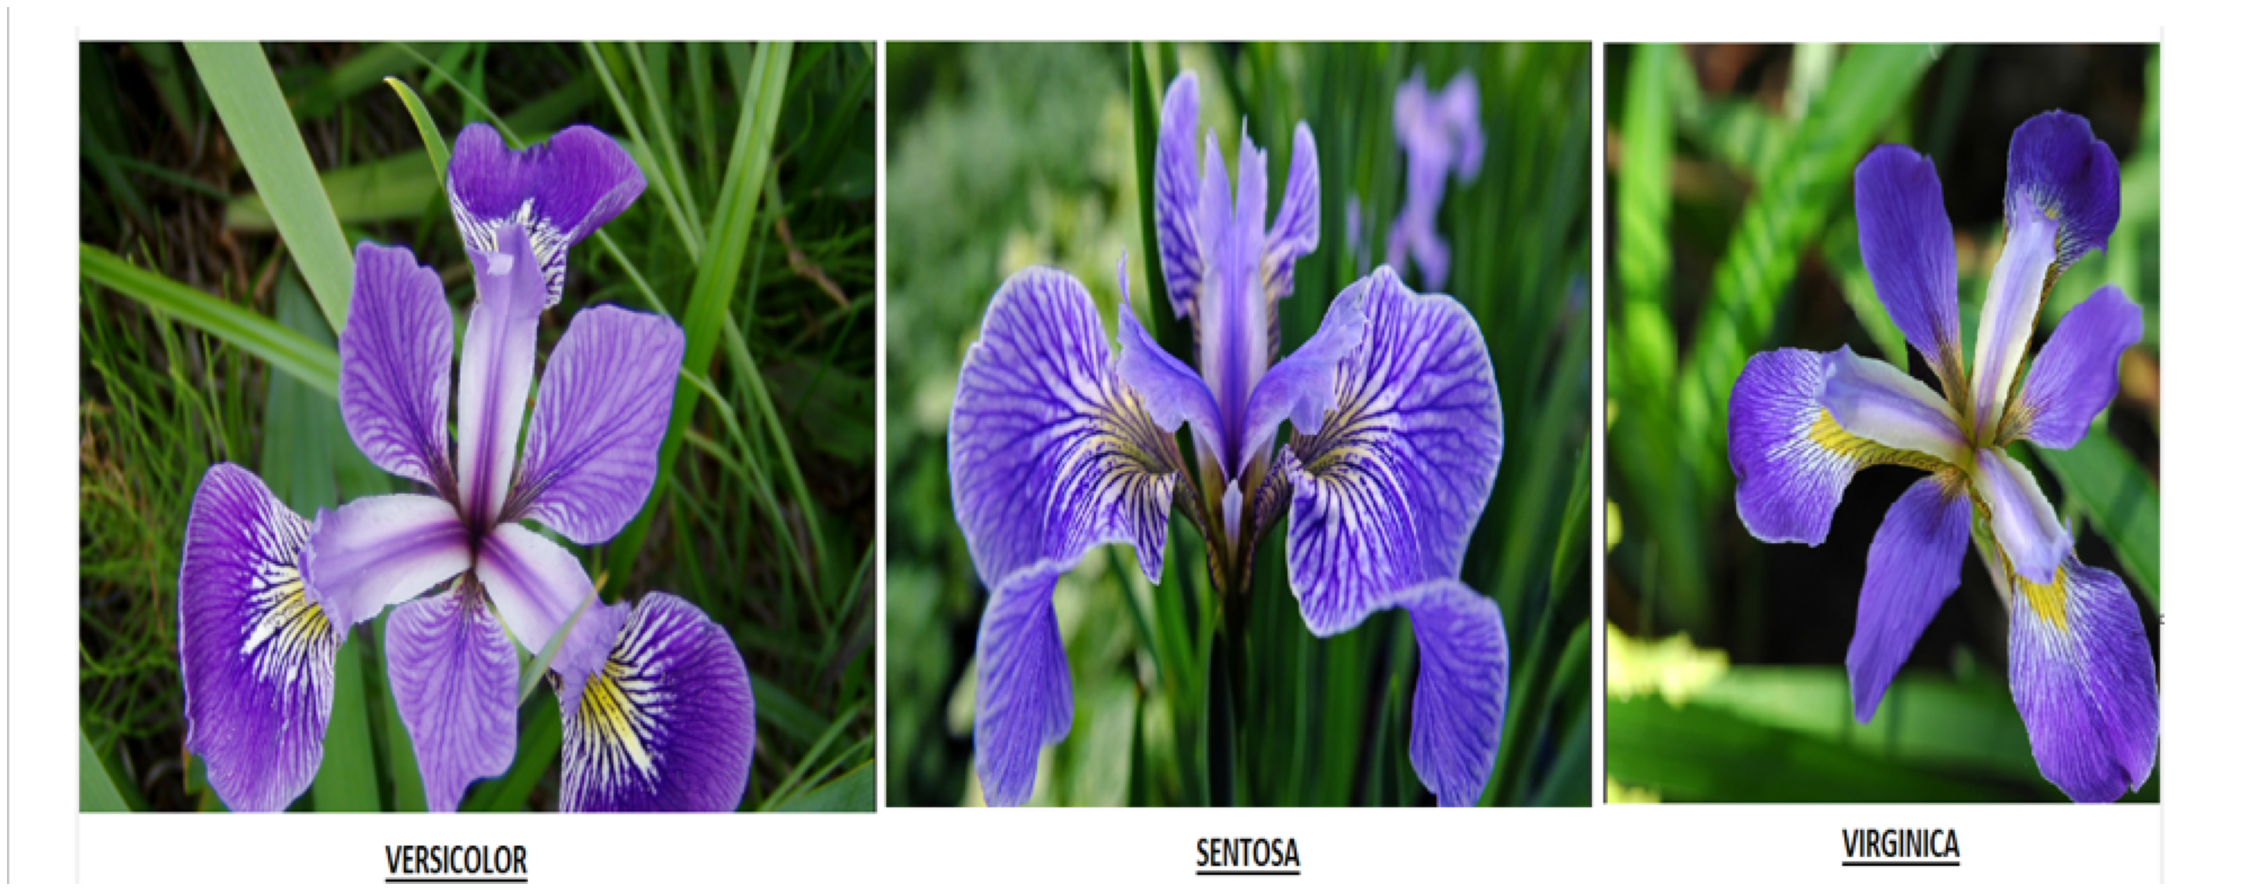

In [6]:
%matplotlib inline
img=mpimg.imread('/content/iris_flowers.png')
plt.figure(figsize=(40,60))
plt.axis('off')
plt.imshow(img)

In [7]:
X = dataset.iloc[:,:4].values
y = dataset['Species'].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [9]:
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelPolyAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Classification is: ', corrPred/(cm.sum()))

[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
Correct predictions:  29
False predictions 1
Accuracy of the SVC Classification is:  0.9666666666666667
